In [28]:
import os
import matplotlib.pyplot as plt
from zipfile import ZipFile
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image             
from keras_preprocessing.image import ImageDataGenerator  
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [29]:
SignLanguageDetection = os.path.join('./SIBI')
print(os.listdir(SignLanguageDetection))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [30]:
SignLanguageDetection=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [31]:
for signlanguage in SignLanguageDetection:
    print(f'{signlanguage} images: ', len(os.listdir(f'./SIBI//{signlanguage}')))

A images:  220
B images:  220
C images:  220
D images:  220
E images:  220
F images:  220
G images:  220
H images:  220
I images:  220
J images:  152
K images:  220
L images:  220
M images:  220
N images:  220
O images:  220
P images:  220
Q images:  220
R images:  220
S images:  220
T images:  220
U images:  220
V images:  220
W images:  220
X images:  220
Y images:  220
Z images:  162


In [32]:
train_folder = os.path.join('./SIBI')
all_data = []
for folder in os.listdir(train_folder):
    label_folder = os.path.join(train_folder, folder)
    only_files = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    all_data += (only_files)

data = pd.DataFrame(all_data)
data


,label,path
0,A,./SIBI\A\1645707869.4431655.jpg
1,A,./SIBI\A\1645707871.4600735.jpg
2,A,./SIBI\A\1645707873.4433305.jpg
3,A,./SIBI\A\1645707875.362499.jpg
4,A,./SIBI\A\1645707878.1629865.jpg
...,...,...
5589,Z,./SIBI\Z\Z_6 - Copy (6).jpg
5590,Z,./SIBI\Z\Z_6 - Copy (7).jpg
5591,Z,./SIBI\Z\Z_6 - Copy (8).jpg
5592,Z,./SIBI\Z\Z_6 - Copy.jpg


In [33]:
# train and test split
x_train, x_holdout = train_test_split(data, test_size=0.1, random_state=42, stratify=data[['label']])
x_train,x_test = train_test_split(x_train, test_size= 0.2, random_state=42,stratify=x_train[['label']])


In [34]:

training_datagen = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range=20,
    brightness_range=[0.2,1.0], 
    height_shift_range=0.1,
    shear_range=0.2, 
    zoom_range=0.1,  
    horizontal_flip=True,  
    fill_mode='nearest',
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

holdout_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
y_col = 'label'
x_col = 'path'
no_of_classes = len(data[y_col].unique())

train_generator = training_datagen.flow_from_dataframe( 
    dataframe=x_train,  x_col=x_col, y_col=y_col, 
    target_size=(150,150), 
    class_mode='categorical', 
    shuffle=False,                                                               
    batch_size=128,
    
)


validation_generator = validation_datagen.flow_from_dataframe(      
    dataframe=x_holdout, x_col=x_col, y_col=y_col,      
    target_size=(150,150),      
    class_mode='categorical',
    shuffle=False,
    batch_size=128
)

holdout_generator = holdout_datagen.flow_from_dataframe(
    dataframe=x_holdout, x_col=x_col, y_col=y_col,
    target_size=(150, 150), 
    class_mode='categorical', 
    batch_size=128,
    shuffle=False
)


Found 4027 validated image filenames belonging to 26 classes.
Found 560 validated image filenames belonging to 26 classes.
Found 560 validated image filenames belonging to 26 classes.


In [36]:
# Show the first batch of images

for batch, labels in train_generator:
    print(batch.shape)
    print(labels.shape)
    break
    
print()

for batch, labels in validation_generator:
    print(batch.shape)
    print(labels.shape)
    break

print()
for batch, labels in holdout_generator:
    print(batch.shape)
    print(labels.shape)
    break

(128, 150, 150, 3)
(128, 26)

(128, 150, 150, 3)
(128, 26)

(128, 150, 150, 3)
(128, 26)


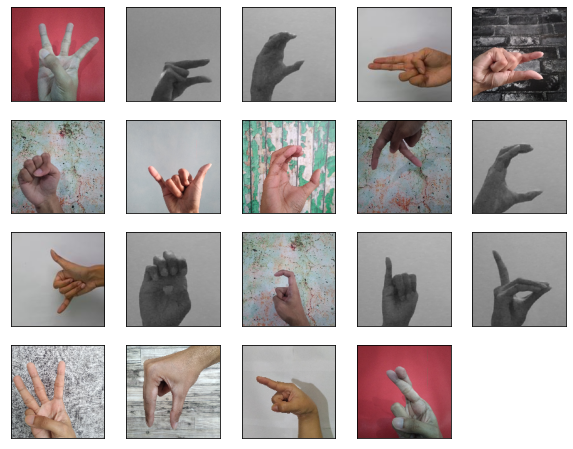

In [37]:
# Show images 

plt.figure(figsize=(10,10))

for i in range(19):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(batch[i], cmap=plt.cm.binary)

In [38]:
# Feature Extraction using MobileNetV2

img_size = 150
img_shape = (img_size, img_size, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape, include_top=False, weights='imagenet')
base_model.trainable = False

In [39]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][

In [40]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 32000)             0         
                                                                 
 dense (Dense)               (None, 128)               4096128   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                        

In [41]:
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [42]:
# # ketika akurasi sudah mencapai 100%  dan nilai loss 10% maka proses training akan berhenti
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('accuracy')>=1.00 and logs.get('loss')<0.1):
#             print("\nAkurasi telah mencapai > 100%!")
#             self.model.stop_training = True

# callbacks = myCallback()

In [43]:
%%time
model.compile(loss='categorical_crossentropy', optimizer=Adam , metrics=['accuracy'])
history4 = model.fit(train_generator, epochs=50, validation_data=validation_generator, verbose=1)


Epoch 1/50
32/32 [==============================] - 376s 12s/step - loss: 3.0782 - accuracy: 0.0931 - val_loss: 2.7965 - val_accuracy: 0.1589
Epoch 2/50
32/32 [==============================] - 331s 10s/step - loss: 2.6115 - accuracy: 0.2518 - val_loss: 2.3174 - val_accuracy: 0.3446
Epoch 3/50
32/32 [==============================] - 316s 10s/step - loss: 2.2113 - accuracy: 0.3881 - val_loss: 1.9603 - val_accuracy: 0.4321
Epoch 4/50
32/32 [==============================] - 333s 11s/step - loss: 1.8746 - accuracy: 0.4805 - val_loss: 1.6533 - val_accuracy: 0.5393
Epoch 5/50
32/32 [==============================] - 327s 10s/step - loss: 1.6419 - accuracy: 0.5572 - val_loss: 1.4542 - val_accuracy: 0.5661
Epoch 6/50
32/32 [==============================] - 319s 10s/step - loss: 1.4462 - accuracy: 0.6069 - val_loss: 1.2708 - val_accuracy: 0.6482
Epoch 7/50
32/32 [==============================] - 326s 10s/step - loss: 1.2533 - accuracy: 0.6581 - val_loss: 1.1358 - val_accuracy: 0.6714
Epoch 

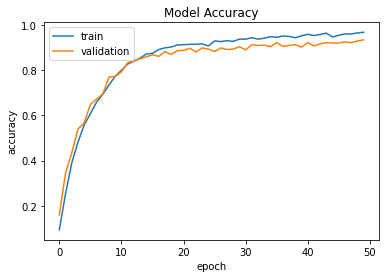

In [44]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

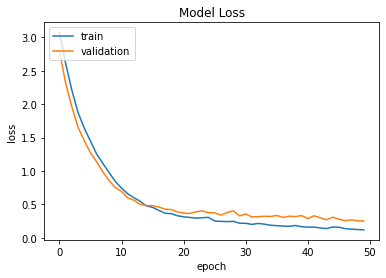

In [45]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [46]:
#save model
model.save('model.h5')

In [47]:
#load model


model = tf.keras.models.load_model('model.h5')

In [48]:
#evaluate model
model.evaluate(validation_generator)

5/5 [==============================] - 59s 9s/step - loss: 0.2505 - accuracy: 0.9339


[0.2505051791667938, 0.9339285492897034]

In [49]:
# confusion matrix
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
# tambahkan ini jika ingin melihat hasil prediksi
print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))



5/5 [==============================] - 50s 9s/step
[22  6  2 20  6 18 24  2 15  2 16  4  2  8  3 21 16 25 17  2 13  6 19 11
  2 13 11 16 12  7 12 18  8 25 20 15  7 12 12  5 24  0  3  1 18  3  4  0
  0 11 24 17  8  8 13 18 23 16 12 14  5  0 10 22 21 21  6 10 19  9 20 21
 20  1 19  4  4 20  2 16 14 10 25 21 16 14 24  6 15 24 22 22  5  8 15  1
 15  0 20 23 24  3 23 21 17 13  8  6 23 21 15 10  8 24 16  7  1 14  2 15
  7 19 13 18  0  3 17 19  4  4 18 23  5 22  1 23 24 16  5 18  6 13 21 12
 16  9  4  2 14 21 12 11  8 18 23 16  6 14  3  4 25 24 16  3 14  4 17  2
 14 21 17  4 19  4 18 13 23 16 21 13 11 18 23 15 14 10 10 11 21 13  4 16
  6  1 20 11  0  6  8 11 11 23 11  6 14 11 24  9  2  0 21 11 24  5  3 11
 12 15  4  1 21  6  8 18  8 24 21 12  5 13 23 20 18 18 13  8 24 22 15 23
  2 16 22 17  5 10 25 17  2  6  6 18  8  2  5  9  5  1 15  0 10  4 20  2
 14 11  0 17 17  7 17  8  5  7  1  5 12  1 24 25 20 22  7 25 13  8 18 21
 18  1 17 10 10 10  7  1 16 13  7 20 19 17  6 23 16 13 10 14  0 10 24 25


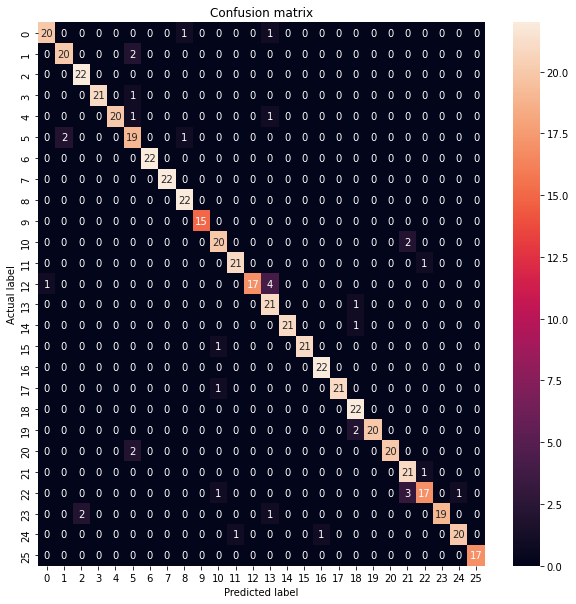

In [50]:
import seaborn as sns

#confusion matrix dengan menggunakan heatmap
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [51]:
#classification report
print('Classification Report')
target_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))



Classification Report
              precision    recall  f1-score   support

           A       0.95      0.91      0.93        22
           B       0.91      0.91      0.91        22
           C       0.92      1.00      0.96        22
           D       1.00      0.95      0.98        22
           E       1.00      0.91      0.95        22
           F       0.76      0.86      0.81        22
           G       1.00      1.00      1.00        22
           H       1.00      1.00      1.00        22
           I       0.92      1.00      0.96        22
           J       1.00      1.00      1.00        15
           K       0.87      0.91      0.89        22
           L       0.95      0.95      0.95        22
           M       1.00      0.77      0.87        22
           N       0.75      0.95      0.84        22
           O       1.00      0.95      0.98        22
           P       1.00      0.95      0.98        22
           Q       0.96      1.00      0.98        22
     

In [52]:
# accuracy score
print('Accuracy Score')
print(accuracy_score(validation_generator.classes, y_pred))

Accuracy Score
0.9339285714285714


In [53]:
# precision score
import sklearn.metrics as metrics 
from sklearn.metrics import precision_score

print('Precision Score')
print(precision_score(validation_generator.classes, y_pred, average='macro'))

Precision Score
0.9417846751617215


In [54]:
# recall score

print('Recall Score')
print(metrics.recall_score(validation_generator.classes, y_pred, average='macro'))

Recall Score
0.9353146853146854


In [55]:
# f1 score

print('F1 Score')
print(metrics.f1_score(validation_generator.classes, y_pred, average='macro'))

F1 Score
0.9360000370733421


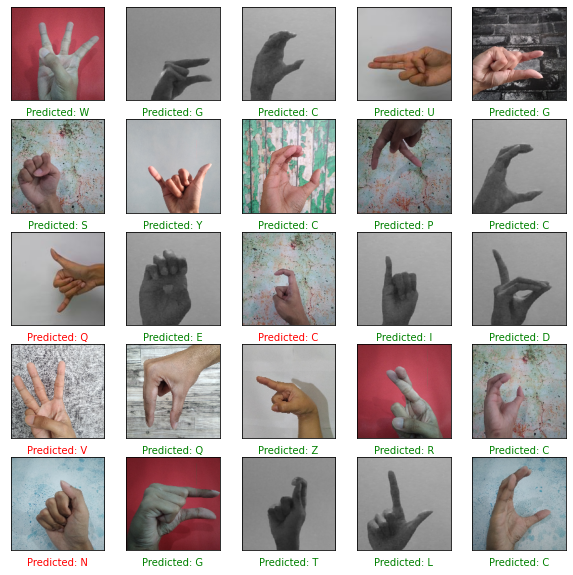

In [56]:
# visualisasi hasil prediksi
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(batch[i], cmap=plt.cm.binary)
    # tulisan warna merah jika salah prediksi dan warna hijau jika benar prediksi
    plt.xlabel('Predicted: {}'.format(target_names[y_pred[i]]), color='green' if y_pred[i] == validation_generator.classes[i] else 'red')
plt.show()

